In [136]:
import requests 
import requests_cache  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#from api_key import key  #API key for Walmart
requests_cache.install_cache('mycache') 
key = 'axmpe5r4q8e6atz2g9ndwykr'

In [137]:
import timeit

In [138]:
#Top trending/popular items name
def popularity():
    ''' Using the Walmart Trending API, we extracted the top 25 bestselling items on Walmart.com
        in descending order. 
        
    Return(s): 
    df_pop -- DataFrame consisting of item name, brand name, item ID, sale prices,
              average of customer ratings, total number of reviews and how you can buy the item
              (store,online or both).
    '''
    popular = requests.get("http://api.walmartlabs.com/v1/trends",params ={"apiKey":key})
    materials = popular.json()['items']
    col_names = ['Item Name','Brand','ItemID','Sale Price','Customer Ratings','Number of Reviews','Offer Type','Department']
    #Item name list
    names = [materials[i]['name'] for i in range(len(materials))] 
    #Consider if the product has customer ratings/num reviews/brand name/item ID/price
    #and then either append or append 'None' for if else.
    
    #Brand name list
    brand = [materials[i]['brandName'] if 'brandName' in materials[i].keys() 
             else 'None' for i in range(len(materials))]    
    #Item IDs list
    item_IDs = [materials[i]['itemId'] if 'itemId' in materials[i].keys() 
                else 'None'for i in range(len(materials))]     
    #Sale price list
    prices = [materials[i]['salePrice'] if 'salePrice' in materials[i].keys() 
              else 'None'for i in range(len(materials))] 
    #How can item be bought list 
    off_type = [materials[i]['offerType'] if 'offerType' in materials[i].keys() 
                else 'None' for i in range(len(materials))]  
    #Customer ratings list
    cust_rates = [materials[i]['customerRating'] if 'customerRating' in materials[i].keys() 
                  else 'None'for i in range(len(materials))]
    #Number of reviews for item list
    num_reviews = [materials[i]['numReviews'] if 'numReviews' in materials[i].keys() 
                   else 'None' for i in range(len(materials))]
    #Department list
    dept = [materials[i]['categoryPath'].split('/')[0] if 'categoryPath' in materials[i].keys() 
                   else 'None' for i in range(len(materials))]
      
    df_pop = pd.DataFrame(list(zip(names,brand,item_IDs,prices,cust_rates,num_reviews,off_type,dept)), columns = col_names)
    return df_pop

#%timeit for x in range(10): popularity()
top25=popularity()
top25

,Item Name,Brand,ItemID,Sale Price,Customer Ratings,Number of Reviews,Offer Type,Department
0,"""RCA Voyager 7"""" 16GB Tablet Android 6.0 (Mars...",RCA,53990885,39.98,3.665,2764,ONLINE_ONLY,Electronics
1,"""Sceptre 50"""" Class FHD (1080P) LED TV (X505BV...",Sceptre,631796609,219.99,4.558,317,ONLINE_AND_STORE,Electronics
2,Thor: Ragnarok (Cinematic Universe Edition) (4...,Buena Vista Home Entertainment,482746173,29.96,None,None,ONLINE_AND_STORE,Movies & TV Shows
3,Refurbished HP Stream Laptop 14-ax030wm N3060 ...,HP,56136485,149,4.5,4,ONLINE_ONLY,Electronics
4,"Kebo Futon Sofa Bed, Multiple Colors",DHP,37663949,109,3.636,2684,ONLINE_AND_STORE,Home
5,"Straight Talk Prepaid Apple iPhone 6 32GB, Spa...",Apple,329264833,199,4.147,109,ONLINE_AND_STORE,Cell Phones
6,"""Refurbished HP 11-v010wm 11.6"""" Chromebook, C...",HP,56095041,129,4.2,5,None,Electronics
7,"""Westcott School Scissors Caddy w/24 Pairs of ...",Westcott,14169846,55.18,4.467,15,ONLINE_ONLY,Office
8,"""Muscle Rack 48""""W x 24""""D x 72""""H 5-Shelf Ste...",Edsal,21685762,59.87,3.769,1374,ONLINE_ONLY,Home Improvement
9,AT PREPAID Samsung Galaxy Express 3 8GB Prepai...,Samsung,51352483,49,3.721,136,ONLINE_AND_STORE,Cell Phones


In [ ]:
#from nltk.corpus import stopwords
#s = set(stopwords.words('english'))
#stopwords = set(STOPWORDS)
#newsepc = spec[(spec['Department']=='Electronics')]
#a = [(newsepc['Item Name'][i].split(" "))for i in range(len(newsepc['Item Name']))]
#df = pd.Series([j for v in a for j in v])
# w = pd.Series([df[i] for i in range(len(df)) if df[i] not in stopwords and df[i][0] !='"' and df[i] != "-"])
#k = pd.Series([df[i][1:len(df[i])] for i in range(len(df)) if df[i][0] == '"'])
#top25['Brand']
#f=tuple([tuple(x) for x in w.append(k).value_counts().reset_index().values])
f=f[0:25]

In [149]:
#stopwords = set(STOPWORDS)
#wordcloud_top25 = WordCloud(background_color="white").generate_from_frequencies(f)
#plt.imshow(wordcloud_top25)
#plt.show() 

In [152]:
# Sub-categories of each department.
def sub_taxonomy():
    ''' Using the Walmart Taxonomy API, we try to extract all sub-categories of each department 
        and some sub-categories of the sub-categories if it exist. 
    
    Return(s):
    df_dept -- Dataframe consisting of columns category IDs(basically department IDs),the name of the 
               sub-category, how to search for it using the search path and the department category 
               belongs to. 
    '''
    taxonomy =  requests.get("http://api.walmartlabs.com/v1/taxonomy", params = {"apiKey":key}) 
    info_col = ['Category Ids','Sub-Category','Specific Path','Department']
    ids = []            #Category Ids list
    spec_item = []      #Sub-categories for all the departments list
    paths = []          #Specific search path list
    names = []          #Department names list 
    
    #First for loop is used to get the department names and ids.
    #Second for loop is used for sub-categorie names and search path.
    #Third for loop is used only when a sub-categorie has more than one sub-sub categorie to extract
    #specific path and name.
    
    tax_j = taxonomy.json()['categories'] #Need to take out information out of nested dict. 
    
    for i in range(len(tax_j)):
        for j in range(len(tax_j[i]['children'])):
            if len(tax_j[i]['children'][j]) == 3:
                ids.append(tax_j[i]['id'])
                spec_item.append(tax_j[i]['children'][j]['name'])
                paths.append(tax_j[i]['children'][j]['path'])
                names.append(tax_j[i]['name'])
            else:
                for k in range(len(tax_j[i]['children'][j]['children'])):
                    ids.append(tax_j[i]['id'])
                    spec_item.append(tax_j[i]['children'][j]['children'][k]['name'])
                    paths.append(tax_j[i]['children'][j]['children'][k]['path'])
                    names.append(tax_j[i]['name'])
    df_dept = pd.DataFrame(list(zip(ids,spec_item,paths,names)), columns = info_col)
    return df_dept


sub_taxonomy()


,Category Ids,Sub-Category,Specific Path,Department
0,1334134,Adult Coloring Books,"Arts, Crafts & Sewing/Art & Drawing Supplies/A...","Arts, Crafts & Sewing"
1,1334134,All Art Supplies,"Arts, Crafts & Sewing/Art & Drawing Supplies/A...","Arts, Crafts & Sewing"
2,1334134,Art Tool Cleaners,"Arts, Crafts & Sewing/Art & Drawing Supplies/A...","Arts, Crafts & Sewing"
3,1334134,Art Tools,"Arts, Crafts & Sewing/Art & Drawing Supplies/A...","Arts, Crafts & Sewing"
4,1334134,Boards & Canvas,"Arts, Crafts & Sewing/Art & Drawing Supplies/B...","Arts, Crafts & Sewing"
5,1334134,Coloring Books,"Arts, Crafts & Sewing/Art & Drawing Supplies/C...","Arts, Crafts & Sewing"
6,1334134,Drawing & Illustration,"Arts, Crafts & Sewing/Art & Drawing Supplies/D...","Arts, Crafts & Sewing"
7,1334134,Drawing Tools & Accessories,"Arts, Crafts & Sewing/Art & Drawing Supplies/D...","Arts, Crafts & Sewing"
8,1334134,Painting,"Arts, Crafts & Sewing/Art & Drawing Supplies/P...","Arts, Crafts & Sewing"
9,1334134,Sketchbooks & Paper,"Arts, Crafts & Sewing/Art & Drawing Supplies/S...","Arts, Crafts & Sewing"


In [161]:
#ax = Departments.plot.barh(stacked=True, edgecolor='none')
#ax.grid(False)
#ax.set_facecolor("white")
#pd.DataFrame(Departments).T.plot.bar(stacked=True )
#pd.DataFrame(Departments).T.plot.bar(stacked=True)
#plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1))
#Departments.plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(9, 7))
#Departments.groupby('D')[['N'].T.plot.bar(stacked=True, rot=0)

#Departments.columns=['D',"N"]
#Departments.set_axis(['a', 'b'], axis='columns', inplace=False)
#Departments
#df = pd.DataFrame(Departments).reset_index()
#df.columns = ['Gene', 'count']
#df.groupby(['Gene']).sum().unstack().plot(kind='bar', stacked=True)

In [12]:
def specific(taxes): 
    ''' Using Walmart Search API,we extracted almost all products on Walmart.com from
        the Taxonomy API.
    Arguement(s):
    taxes -- dataframe containing sub-categories
    
    Return(s):
    df_specs -- Dataframe containing specific item names, the item's ID, price, rating out of 5,
                total number of reviews for product, how to buy, and which department it belongs to. 
    '''
    col_names2 = ['Item Name','ItemID','Sale Price','Customer Ratings','Number of Reviews','Offer Type','Department'
                  ,'Shipping Rate','Normal Shipping','Marketplace']

    item_IDs = []
    names = []
    prices = []
    rates = []
    reviews = []
    offs = []
    ship_rate = []
    ship_2 = []
    market = []
    paths = [] 
    #First for loop extracts all the items in the sub-categories. 
    #Second for loop extracts information from EVERY item in the sub-categories. 
    for i in range(len(taxes['Category Ids'].tolist())):
        searcher = requests.get('http://api.walmartlabs.com/v1/search',params = {
            "apiKey":key,
            "query":taxes['Sub-Category'].tolist()[i],
            "categoryId":taxes['Category Ids'].tolist()[i]
        })
        
        sea_j = searcher.json() #Define a variable for .json() for convenience.
        
        if 'items' in sea_j.keys():  #Consider if there are any items under sub-category.
            for j in range(len(sea_j['items'])):
                #Consider only when the item has ratings, a set amount of reviews and know how to buy. 
                if set(('customerRating','salePrice','numReviews','offerType','itemId','standardShipRate'
                        ,'isTwoDayShippingEligible','marketplace')).issubset(sea_j['items'][j]):
                    item_IDs.append(sea_j['items'][j]['itemId'])
                    names.append(sea_j['items'][j]['name'])
                    prices.append(sea_j['items'][j]['salePrice'])
                    offs.append(sea_j['items'][j]['offerType'])
                    rates.append(sea_j['items'][j]['customerRating'])
                    reviews.append(sea_j['items'][j]['numReviews'])   
                    paths.append(sea_j['items'][j]['categoryPath'].split('/')[0])
                    market.append(sea_j['items'][j]['marketplace'])
                    ship_rate.append(sea_j['items'][j]['standardShipRate'])
                    ship_2.append(sea_j['items'][j]['isTwoDayShippingEligible'])
        else:    #Do not do anything if no items. 
            pass
    df_specs = pd.DataFrame(list(zip(names,item_IDs,prices,rates,reviews,offs
                                ,paths,ship_rate,ship_2,market)), columns = col_names2)
    return df_specs


In [140]:
#spec.to_dense().to_csv("spec.csv", index = True, sep=',', encoding='utf-8')
spec = pd.read_csv("spec.csv")

# Part ? 

# Further Analyses and Concerns
We are instersted to do some future analysis for the Walmart data set. We noticed that customer's online shopping experiences are essential to determine their satisfaction levels of a E-commerce Platform. Thus, we do some classification for our data set and see how walmart.com can provide some good recommendations to their online customers. We select some departments as exmpales and use wordcloud to better visualize our results. 

In [148]:
stopwords = set(STOPWORDS)
def words(department):
    """
    this function returns strings of all item names in each department 
    
    input: department name
    
    output: splited strings of all item names
    """
    gen = ''.join(spec[(spec['Department']==department)]['Item Name'])
    return gen

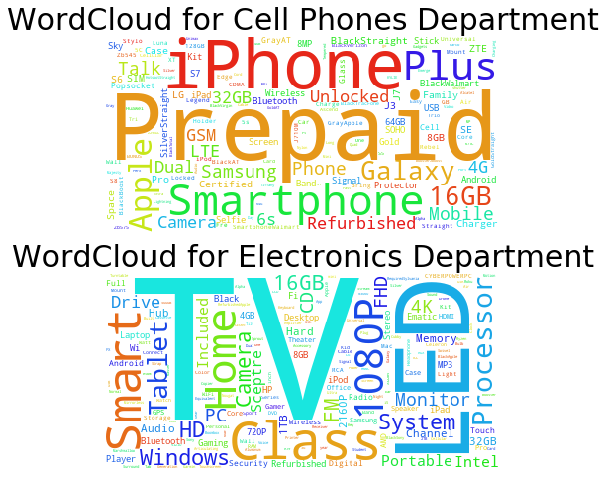

In [135]:
wordcloud_clothing = WordCloud(background_color="white",stopwords=stopwords).generate(words('Cell Phones'))
wordcloud_baby = WordCloud(background_color="white",stopwords=stopwords).generate(words('Electronics'))

plt.figure(figsize=(14,8))
plt.subplot(211)
plt.imshow(wordcloud_clothing)
plt.axis('off')
plt.title('WordCloud for Cell Phones Department',fontsize=30)

plt.subplot(212)
plt.imshow(wordcloud_baby)
plt.title('WordCloud for Electronics Department',fontsize=30)
plt.axis('off')
plt.show()

The basic idea of using classification here is to predict online customers' preference and shopping objectives.  The wordcloud of different departments give us a simple idea about some key words for different departments. For example, if a customer searches for 'Prepaid' or 'TV', then we think there is a high probability that the customers is looking for goods in Cell Phone department or Electronics department respectively. However, there are some key words are confusing because they appear on both departments such as '16GB', 'Smart' and 'Refurbished'. In this case, it's hard for a computer to distinguish what department the customer is shopping for. Thus, we need classification here to make better prediction and some future applications on machine learning.

From the wordcloud of the cell phone, we can also find out some evidences about Walmart's business value - low prices. We notice that the word like 'Prepaid', 'Refurbished' have high frequency in the cell phone department, and the average sale price of this department is XX. This might be a business strategy of Walmart to provide low-price and affordable electronic items. 

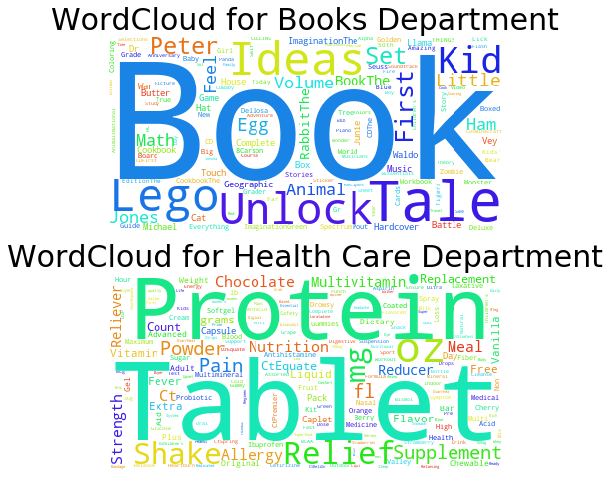

In [145]:
wordcloud_books = WordCloud(background_color="white",stopwords=stopwords).generate(words('Books'))
wordcloud_health = WordCloud(background_color="white",stopwords=stopwords).generate(words('Health'))

plt.figure(figsize=(14,8))
plt.subplot(211)
plt.imshow(wordcloud_books)
plt.axis('off')
plt.title('WordCloud for Books Department',fontsize=30)

plt.subplot(212)
plt.imshow(wordcloud_health)
plt.title('WordCloud for Health Care Department',fontsize=30)
plt.axis('off')
plt.show()